# Gaussian PRM test

In [1]:
import pickle
import numpy as np

from swarm_prm.solvers.utils.gaussian_prm import GaussianPRM
from swarm_prm.solvers.utils.gaussian_utils import GaussianGraphNode
from swarm_prm.envs.roadmap import Roadmap, Obstacle 
from swarm_prm.envs.instance import Instance

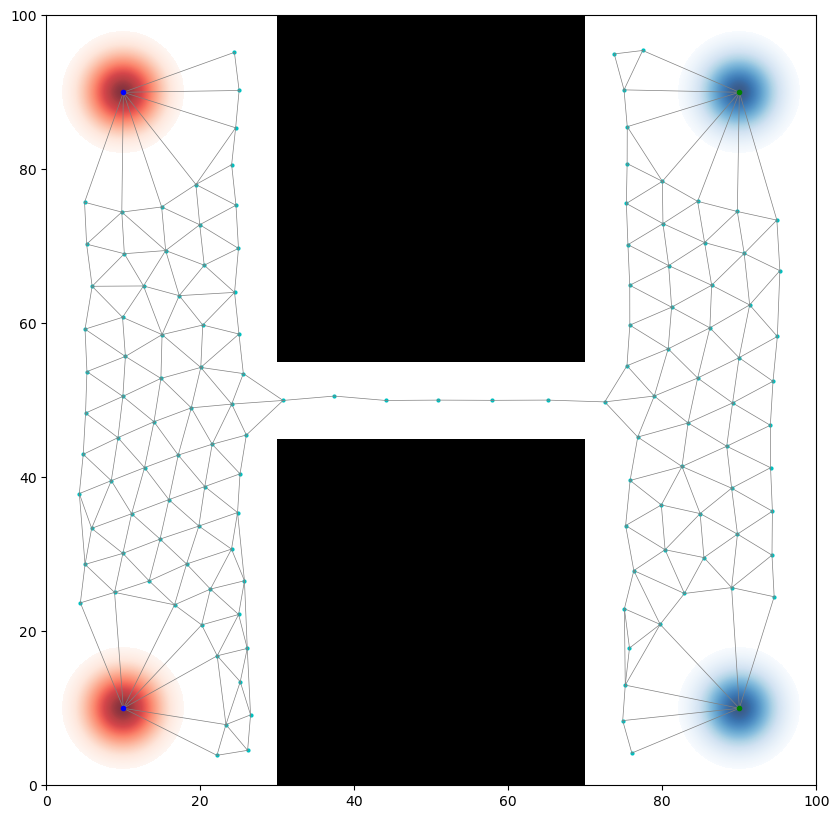

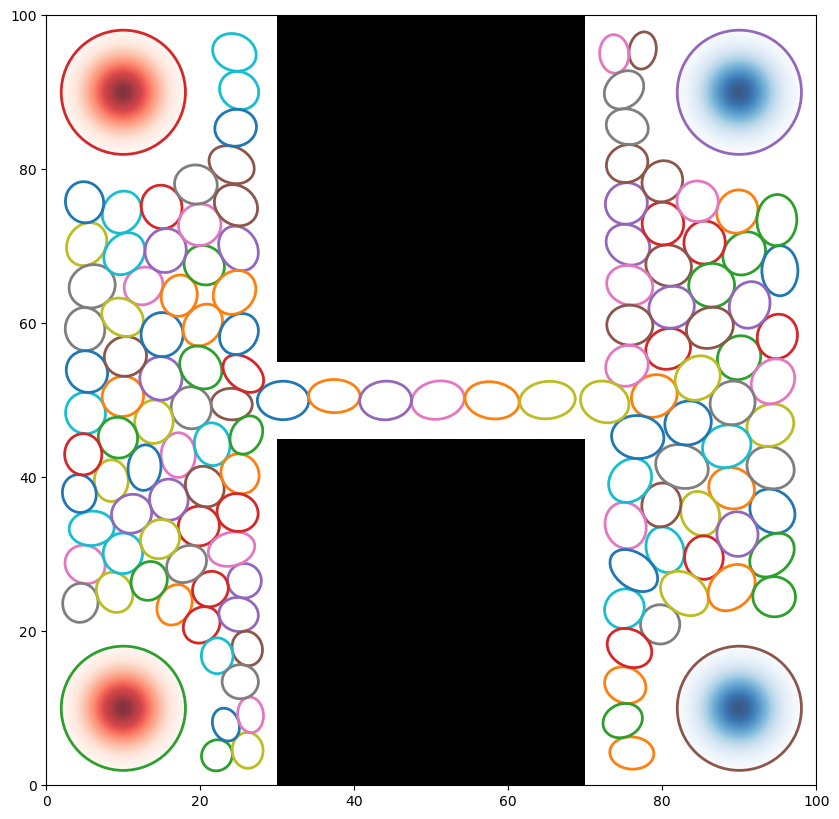

In [2]:
roadmap = Roadmap(100, 100)
safety_radius = 2 
pos = np.array([50, 50])
obstacles  = [
    Obstacle(None, "POLYGON", [(30, 0), (30, 45), (70, 45), (70, 0)]),
    Obstacle(None, "POLYGON", [(30, 100), (30, 55), (70, 55), (70, 100)])
]
num_samples = 150
for obs in obstacles:
    roadmap.add_obstacle(obs)
# fig, ax = roadmap.visualize()
start_mean = np.random.rand(2) * 100
goal_mean = np.random.rand(2) * 100

# Agent config
num_agent = 50
agent_radius = 2
sampling_method = "GAUSSIAN_SAMPLING"
#sampling_method = "SWARMPRM_SAMPLING"
hex_radius = 3
TEST_CVAR = False


# Curated test instance
starts = np.array([[10, 10], [10, 90]])
goals = np.array([[90, 90], [90, 10]])

starts_weight = np.array([.5, .5])
goals_weight = np.array([.5, .5])

g_starts = [GaussianGraphNode(start, None, "UNIFORM", radius=10) for start in starts]
g_goals = [GaussianGraphNode(goal, None, "UNIFORM", radius=10) for goal in goals]

instance = Instance(roadmap, g_starts, g_goals, starts_weight, goals_weight)

gaussian_prm = GaussianPRM(instance, num_samples, safety_radius=safety_radius,
                           hex_radius=hex_radius)
gaussian_prm.sample_free_space(sampling_strategy="CVT")
gaussian_prm.load_instance()
gaussian_prm.build_roadmap(roadmap_method="TRIANGULATION", radius=10, collision_check_method="CVAR")
fig, ax = gaussian_prm.visualize_roadmap("test_map")
gaussian_prm.visualize_g_nodes()

from matplotlib.patches import Circle

for start in g_starts:
    mean = start.get_mean()
    radius = start.get_radius()
    ax.add_patch(Circle(mean, radius))

with open("gaussian_prm.pkl", "wb") as f:
    pickle.dump(gaussian_prm, f)


In [3]:
from scipy.spatial import KDTree

kd_tree = KDTree(gaussian_prm.samples)
kd_tree.query([10, 20])
gaussian_prm.samples[22]


array([94.23943494, 29.88949228])